#**Deep Learning Homework 3: Convolutional Neural Networks**

### MSc Computer Science, Data Science, Cybersecurity @UniPD
### 2nd semester - 6 ECTS
### Prof. Nicolò Navarin & Prof. Alessandro Sperduti
---
In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [2]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


170508288/170498071 [==============================] - 3s 0us/step


Let's take a look at a sample of the images in the dataset:

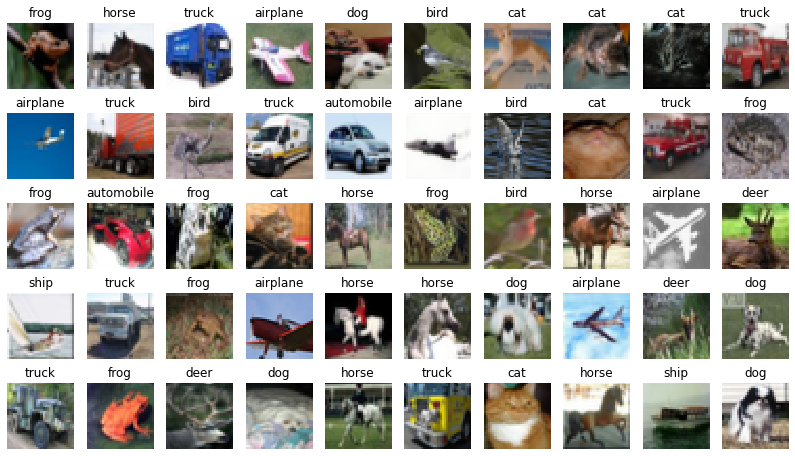

In [3]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [4]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)


mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/(std) #[TO COMPLETE]
X_valid = (X_valid - mean)/(std)#[TO COMPLETE]
X_test = (X_test - mean)/(std)#[TO COMPLETE]

#Add one dimension to manage the channel if you are using grayscale images.
#X_train=tf.expand_dims(X_train, 3) 
#X_valid=tf.expand_dims(X_valid, 3) 
#X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 32s 91ms/step - loss: 1.4491 - accuracy: 0.4947 - val_loss: 1.2458 - val_accuracy: 0.5628
Epoch 2/10
352/352 [==============================] - 32s 90ms/step - loss: 1.1510 - accuracy: 0.6015 - val_loss: 1.1176 - val_accuracy: 0.6132
Epoch 3/10
352/352 [==============================] - 33s 95ms/step - loss: 1.0272 - accuracy: 0.6485 - val_loss: 1.0588 - val_accuracy: 0.6352
Epoch 4/10
352/352 [==============================] - 35s 99ms/step - loss: 0.9530 - accuracy: 0.6717 - val_loss: 1.0210 - val_accuracy: 0.6540
Epoch 5/10
352/352 [==============================] - 36s 102ms/step - loss: 0.9046 - accuracy: 0.6908 - val_loss: 1.0448 - val_accuracy: 0.6434
Epoch 6/10
352/352 [==============================] - 35s 98ms/step - loss: 0.8672 - accuracy: 0.7031 - val_loss: 1.0425 - val_accuracy: 0.6442
Epoch 7/10
352/352 [==============================] - 34s 98ms/step - loss: 0.8305 - accuracy: 0.7180 - val_loss: 1.0148 - val_accuracy

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 3s - loss: 1.0627 - accuracy: 0.6487 - 3s/epoch - 9ms/step
accuracy: 64.87%


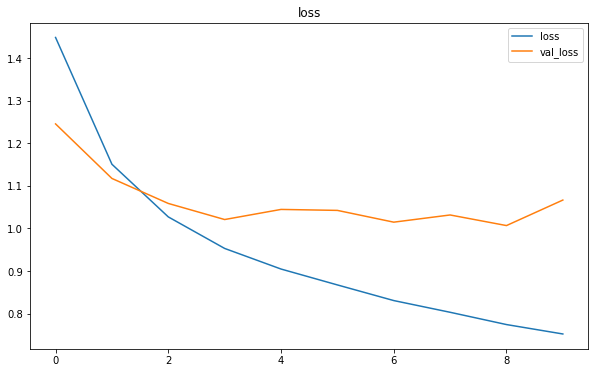

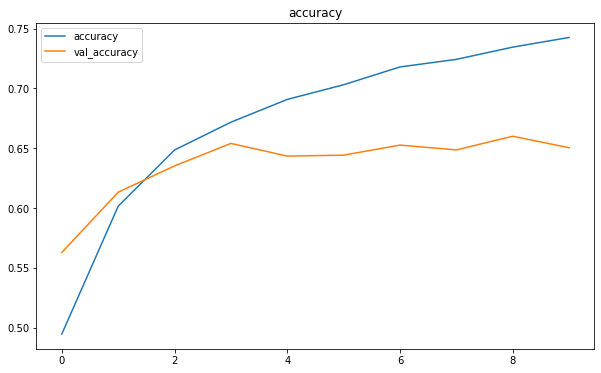

In [8]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

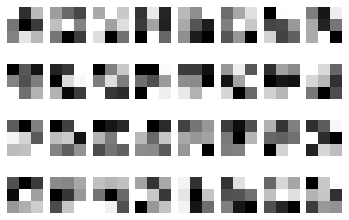

In [9]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   [TO COMPLETE] Answer to question 1
Paameters are the learnable elements in that layer. Therefore to calculate the number of parameters in the Conc2D layers, we multiply the shape of width (m), height (n), the previous layer's filters (d), and the number of filters in the current layer (k). However we also have to account for the bias term so we add the 1. The final calculation looks like this: ((m * n * d)+1)* k). 

((shape of width of the filter * shape of height of the filter * number of filters in the previous layer + 1)* number of filters).

For the first Conv2D layer: ((3 * 3 * 3) + 1) * 32 = 896
here the 'number of filters in the previous layer' = 3 because it is an RGB image that has 3 channels.

For the second Conv2D layer: ((2 * 2 * 32) + 1) * 16 = 2064
here the 'number of filters in the previous layer' = 32 because the maxPooling layer has an output of 32 channels


2.   [TO COMPLETE] Answer to question 2

They have a different number of parameters because of the way the number of parameters is calculated as explained above. For the first layer, the shape of the width, height is 2x2 and the 'number of filters in the previous layer' is 3. Additionally, the number of filters in the current layer are 32.
For the 2nd layer, the shape is 2x2 and the 'number of filters in the previous layer is 32. while the number of filters in the current layer is 16. Therefore, the calculation of the number of paramters of the 2 layers comes out to differnt numbers.

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 39s 109ms/step - loss: 1.6103 - accuracy: 0.4248 - val_loss: 1.3535 - val_accuracy: 0.5270
Epoch 2/10
352/352 [==============================] - 36s 102ms/step - loss: 1.2969 - accuracy: 0.5447 - val_loss: 1.2218 - val_accuracy: 0.5868
Epoch 3/10
352/352 [==============================] - 39s 111ms/step - loss: 1.1843 - accuracy: 0.5869 - val_loss: 1.1546 - val_accuracy: 0.6062
Epoch 4/10
352/352 [==============================] - 36s 102ms/step - loss: 1.1067 - accuracy: 0.6174 - val_loss: 1.0779 - val_accuracy: 0.6306
Epoch 5/10
352/352 [==============================] - 36s 103ms/step - loss: 1.0529 - accuracy: 0.6350 - val_loss: 1.0621 - val_accuracy: 0.6346
Epoch 6/10
352/352 [==============================] - 37s 105ms/step - loss: 1.0172 - accuracy: 0.6493 - val_loss: 1.0321 - val_accuracy: 0.6484
Epoch 7/10
352/352 [==============================] - 38s 107ms/step - loss: 0.9911 - accuracy: 0.6605 - val_loss: 1.0189 - val_ac

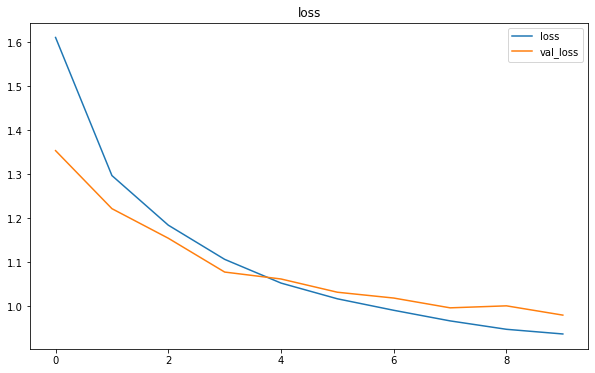

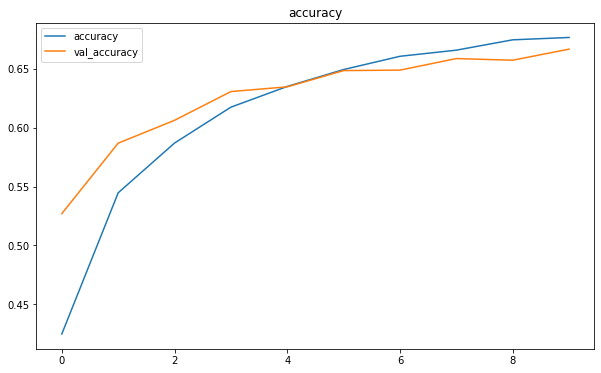

In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

Epoch 1/10
352/352 [==============================] - 73s 205ms/step - loss: 1.4333 - accuracy: 0.4971 - val_loss: 1.1839 - val_accuracy: 0.5902
Epoch 2/10
352/352 [==============================] - 69s 196ms/step - loss: 1.0794 - accuracy: 0.6252 - val_loss: 1.0149 - val_accuracy: 0.6504
Epoch 3/10
352/352 [==============================] - 67s 192ms/step - loss: 0.9420 - accuracy: 0.6795 - val_loss: 0.9671 - val_accuracy: 0.6646
Epoch 4/10
352/352 [==============================] - 67s 190ms/step - loss: 0.8692 - accuracy: 0.7021 - val_loss: 0.9053 - val_accuracy: 0.6846
Epoch 5/10
352/352 [==============================] - 68s 194ms/step - loss: 0.8082 - accuracy: 0.7233 - val_loss: 0.8971 - val_accuracy: 0.6930
Epoch 6/10
352/352 [==============================] - 67s 191ms/step - loss: 0.7573 - accuracy: 0.7403 - val_loss: 0.8717 - val_accuracy: 0.7034
Epoch 7/10
352/352 [==============================] - 67s 191ms/step - loss: 0.7167 - accuracy: 0.7528 - val_loss: 0.8444 - val_ac

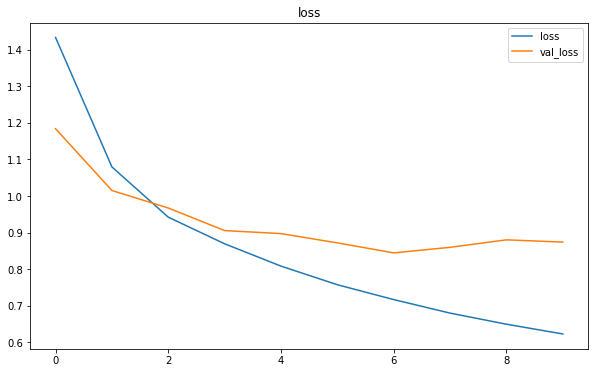

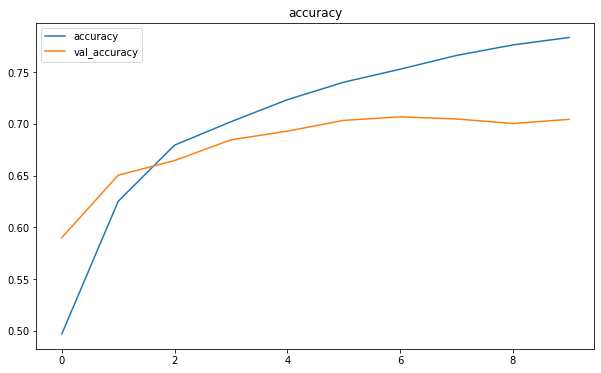

In [12]:
#[TO COMPLETE]

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=64, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

### [TO COMPLETE] Example of tests discussion
The best model that I found is the one where I changed the number of filters for the 2 Conv2D layers. The first Conv2D filters were changed from 32 to 64 and second Conv2D filters were changed from 16 to 64

The achieved accuracy in the test set is 70.11% which is more than the original accuracy of 66.33%

Discussion:
The accuracy of the model probably increased because increasing the number of filters allows the model to capture more complex patterns. The more the filters there are in the layers the higher the number of abstractions our model can capture from the dataset.

Besides, I tested also other models: Discussion:
* Changed activation functions: I changed the activation function to sigmoid from the original relu. This decreased accuracy to 54.61%. This is probably because the sigmoid function is quite different from relu. Relu works better on these types of cnn and image datasets.
* epochs: change from 10 - 15. This increased the accuracy to 67.17%. Increasing epochs helps the model learn the dataset more number of times and therefore is able to learn better. originally the model was probably underfitting. However, if the number of epochs is increased too then the model might ovefit.
* batch sizes: Changed from 128 to 256. This decreased the accuracy to 64.55%. A larger batch size might be to big for the model to learn efficiently therefore 128 batch size seems to be a better fit
* optimizer: Changed from "adam" to "adagrad" didnt produce any considerable difference either 
* max-pooling: Changing the max-pooling off and changing the max pool size both decreases the accuracy. removing max pool laeyrs probably makes the model learn unimportant features and patterns. using maxpooling, only the important information is passed down and therefore the model is able to learn features from these important information only bettering the odds of learning a better generalisation.
